<a href="https://colab.research.google.com/github/Sanjith2003/Emotion_Recog_Bay_area_Hack./blob/main/Project_Image_classifcation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import All the dependencies.

In [175]:
import tensorflow as tf
import os


In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The bottom lines are about the GPU and on how to limit the GPU usage.

In [177]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus) #this gives a list of gpus that we have in the system.

[]


In [178]:
#To avoid out of memory error(oom error) by the gpu:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:  #We are restricitng the memoty growth of all the gpus availabe with us.
  tf.config.experimental.set_memory_growth(gpu,True)

To remove improper images.

In [179]:
import cv2
import imghdr

In [180]:
data_dir = '/content/drive/MyDrive/Data'

In [181]:
os.listdir(data_dir)

['sad', 'happy']

In [182]:
img_ext = ['jpeg','png','bmp','jpg'] #standard image extensions.

In [183]:
for i in os.listdir(data_dir): #iterating through the Data directory.
  for image in os.listdir(os.path.join(data_dir,i)): #iterating through every image class.
    image_path = os.path.join(data_dir,i,image)
    try:
      img = cv2.imread(image_path) #this will read the image using opencv -> numpy array.(pixels)
      tip = imghdr.what(image_path)
      if tip not in img_ext: #checking for images that are not of proper extension.
        print('Image not in extensions list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))




Load Data


In [184]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [185]:
import numpy as np
from matplotlib import pyplot as plt

This line basically created a nice dataset which can be used to train the model.

In [186]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Data') #The function reads the image files from the directory, and creates a dataset that can be used for training or evaluation of a machine learning model.

Found 543 files belonging to 2 classes.


In [187]:
data_iter = data.as_numpy_iterator() #this created a iterator to iterate over the dataset created.
print(data_iter)

In [188]:
batch = data_iter.next()
batch

(array([[[[233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          ...,
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ]],
 
         [[233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          ...,
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ]],
 
         [[233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          ...,
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ]],
 
         ...,
 
         [[233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          ...,
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ],
          [233.  , 219.  , 210.  ]],
 
         [[233.  , 219.  , 210.  ],
          [2

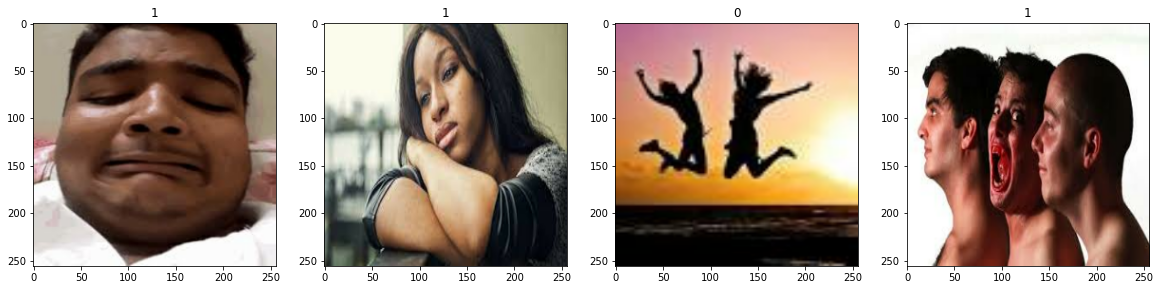

In [41]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
# 0 means happy and 1 means sad.

Scaling the data -> Reducing the size of the image instead of having it between 0 and 250.

In [189]:
data = data.map(lambda x,y: (x/255,y)) #scaling the img sizes between 0 and 1. Basically like a hash function.

In [190]:
scaled_iter = data.as_numpy_iterator()

In [191]:
batch = scaled_iter.next()

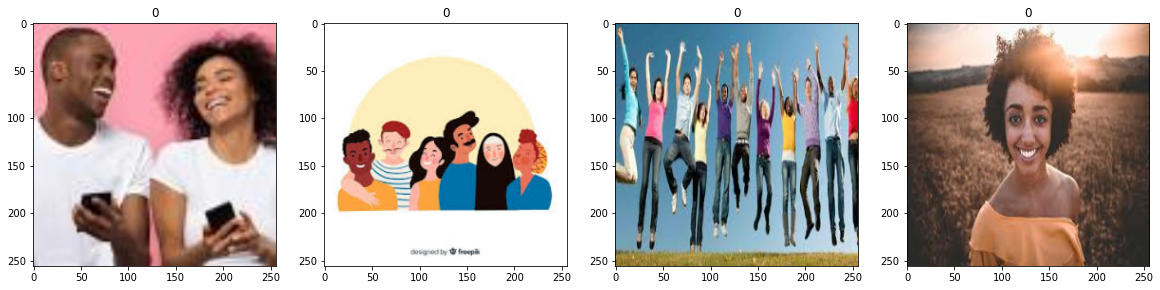

In [192]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20)) #plotting whatever we got in one batch.
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Splitting the data into training and testing data.
This is done so as to ensure we haven't overfitted our model.

In [193]:
train_size = int(len(data)* 0.7) #70% of the data is for training.
test_size = int(len(data) * 0.2) + 1 # 20% of the data is for testing. -> this will never be seen by the model until we train it.
val_size = int(len(data) * 0.1) + 1 # 10% of the data is for validation.
len(data)

17

In [194]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
len(val)


2

Deep Learning Model starts here.

Building our Model:


In [195]:
from tensorflow.keras.models import Sequential #if we want one data input and one data output.
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout #Conv2D is a 2-D CNN.

In [196]:
model = Sequential()

In [197]:
model.add(Conv2D(16,(3,3),1,activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())


model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) 



In [198]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [199]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 16)      

Training the model.

In [200]:
logdir = '/content/drive/MyDrive/logs'

In [201]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [202]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
11/11 [==============================] - 36s 3s/step - loss: 1.0955 - accuracy: 0.5057 - val_loss: 0.6755 - val_accuracy: 0.7500
Epoch 2/20
11/11 [==============================] - 36s 3s/step - loss: 0.6293 - accuracy: 0.7045 - val_loss: 0.6209 - val_accuracy: 0.6719
Epoch 3/20
11/11 [==============================] - 32s 3s/step - loss: 0.5174 - accuracy: 0.7614 - val_loss: 0.3830 - val_accuracy: 0.8750
Epoch 4/20
11/11 [==============================] - 34s 3s/step - loss: 0.3687 - accuracy: 0.8210 - val_loss: 0.4164 - val_accuracy: 0.7969
Epoch 5/20
11/11 [==============================] - 38s 3s/step - loss: 0.2761 - accuracy: 0.8977 - val_loss: 0.2497 - val_accuracy: 0.9062
Epoch 6/20
11/11 [==============================] - 38s 3s/step - loss: 0.2346 - accuracy: 0.8949 - val_loss: 0.2067 - val_accuracy: 0.9219
Epoch 7/20
11/11 [==============================] - 36s 3s/step - loss: 0.1410 - accuracy: 0.9659 - val_loss: 0.1595 - val_accuracy: 0.9375
Epoch 8/20
11/11 [==

In [203]:
hist.history

{'loss': [1.0955289602279663,
  0.6293061375617981,
  0.5174112319946289,
  0.36869773268699646,
  0.2761398255825043,
  0.2345799058675766,
  0.1410350799560547,
  0.1209891065955162,
  0.07226455956697464,
  0.04761969670653343,
  0.02311641164124012,
  0.028955865651369095,
  0.031170658767223358,
  0.02577565424144268,
  0.016551703214645386,
  0.02341109700500965,
  0.03227406367659569,
  0.014313582330942154,
  0.01692047528922558,
  0.006901734974235296],
 'accuracy': [0.5056818127632141,
  0.7045454382896423,
  0.7613636255264282,
  0.8210227489471436,
  0.8977272510528564,
  0.8948863744735718,
  0.9659090638160706,
  0.9573863744735718,
  0.9857954382896423,
  0.9886363744735718,
  0.9943181872367859,
  0.9886363744735718,
  0.9943181872367859,
  0.9914772510528564,
  1.0,
  0.9943181872367859,
  0.9914772510528564,
  1.0,
  0.9971590638160706,
  0.9971590638160706],
 'val_loss': [0.6754769086837769,
  0.620879590511322,
  0.38299110531806946,
  0.4163961410522461,
  0.249685

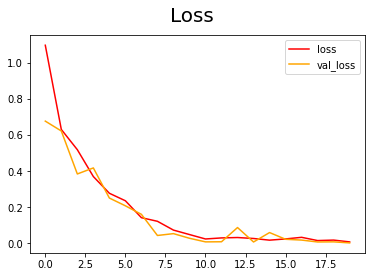

In [204]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'red',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

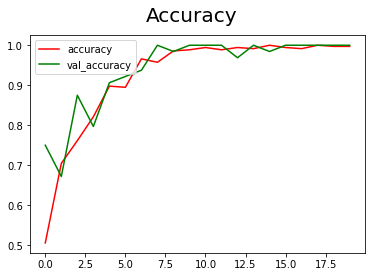

In [205]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'red',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'green',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Testing the Model:

In [141]:
p = '/content/drive/MyDrive/happyface.jpg'

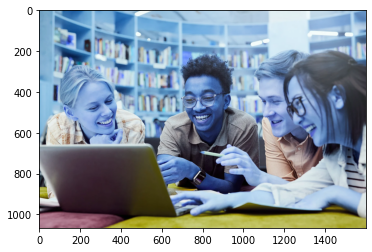

In [142]:
img = cv2.imread(p)
plt.imshow(img)
plt.show()



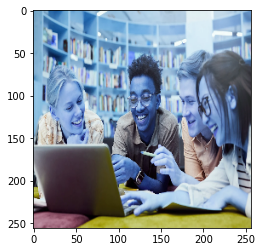

In [143]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [144]:
y_hat = model.predict(np.expand_dims(resize/255,0))
y_hat

1/1 [==============================] - 0s 342ms/step


array([[0.]], dtype=float32)

In [145]:
p = '/content/drive/MyDrive/sadface.jpg'

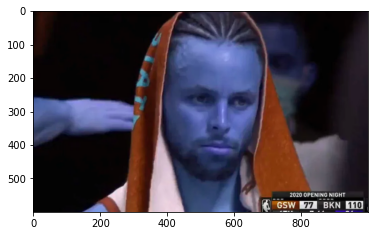

In [146]:
img = cv2.imread(p)
plt.imshow(img)
plt.show()


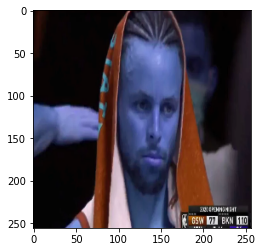

In [148]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
y_hat = model.predict(np.expand_dims(resize/255,0))
y_hat

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)

In [151]:
from tensorflow.keras.models import load_model

In [206]:
def get(a):
  if a > 0.5:
    print("Sad")
  else:
    
    print("Happy")

In [207]:
def prediction(p):
  img = cv2.imread(p)
  resize = tf.image.resize(img,(256,256))
  y_hat = model.predict(np.expand_dims(resize/255,0))
  
  get(y_hat)



In [1]:
prediction('/content/drive/MyDrive/img.jpg')

NameError: ignored